## KarpovCourses. Продуктовая аналитика 
### Сегментация клиентов в Python 
 
### RFM-анализ

In [1]:
import pandas as pd
import numpy as np


# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'

In [2]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/rfm_data.csv',sep=',')

In [3]:
orders

,order_date,order_id,customer,grand_total
0,9/7/11,CA-2011-100006,Dennis Kane,378
1,7/8/11,CA-2011-100090,Ed Braxton,699
2,3/14/11,CA-2011-100293,Neil Franz�sisch,91
3,1/29/11,CA-2011-100328,Jasper Cacioppo,4
4,4/8/11,CA-2011-100363,Jim Mitchum,21
...,...,...,...,...
5004,11/4/14,US-2014-168802,Jack O'Briant,18
5005,7/24/14,US-2014-169320,Lena Hernandez,171
5006,9/8/14,US-2014-169488,Allen Armold,57
5007,8/29/14,US-2014-169502,Matthew Grinstein,113


In [4]:
orders.customer.nunique()

793

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_date   5009 non-null   datetime64[ns]
 1   order_id     5009 non-null   object        
 2   customer     5009 non-null   object        
 3   grand_total  5009 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 156.7+ KB


In [6]:
orders.order_date = pd.to_datetime(orders.order_date)

In [8]:
orders.order_id = orders.order_id.apply(str)
orders.customer = orders.customer.apply(str)

In [10]:
orders.order_date.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    5009
unique                   1238
top       2013-09-06 00:00:00
freq                       19
first     2011-01-04 00:00:00
last      2014-12-31 00:00:00
Name: order_date, dtype: object

In [11]:
last_date = orders.order_date.max()

In [12]:
last_date

Timestamp('2014-12-31 00:00:00')

In [13]:
rfmTable = orders.groupby('customer').agg({'order_date': lambda x: (last_date - x.max()).days, # Recency #Количество дней с последнего заказа
                                        'order_id': lambda x: len(x),      # Frequency #Количество заказов
                                        'grand_total': lambda x: x.sum()}) # Monetary Value #Общая сумма по всем заказам

In [14]:
rfmTable

,order_date,order_id,grand_total
customer,,,
Aaron Bergman,415,3,887
Aaron Hawkins,12,7,1744
Aaron Smayling,88,7,3050
Adam Bellavance,54,8,7756
Adam Hart,34,10,3249
...,...,...,...
Xylona Preis,43,11,2375
Yana Sorensen,9,8,6721
Yoseph Carroll,4,5,5455


In [15]:
rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'recency', 
                         'order_id': 'frequency', 
                         'grand_total': 'monetary_value'}, inplace=True)

In [16]:
rfmTable

,recency,frequency,monetary_value
customer,,,
Aaron Bergman,415,3,887
Aaron Hawkins,12,7,1744
Aaron Smayling,88,7,3050
Adam Bellavance,54,8,7756
Adam Hart,34,10,3249
...,...,...,...
Xylona Preis,43,11,2375
Yana Sorensen,9,8,6721
Yoseph Carroll,4,5,5455


In [17]:
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])

In [18]:
quantiles

,recency,frequency,monetary_value
0.25,30.0,5.0,1145.0
0.50,75.0,6.0,2257.0
0.75,183.0,8.0,3784.0


In [19]:
rfmSegmentation = rfmTable

In [20]:

def RClass(value,parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 1
    elif value <= quantiles_table[parameter_name][0.50]:
        return 2
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 3
    else:
        return 4


def FMClass(value, parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 4
    elif value <= quantiles_table[parameter_name][0.50]:
        return 3
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 2
    else:
        return 1


In [21]:

rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles))

rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles))

rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [22]:
rfmSegmentation

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
Aaron Bergman,415,3,887,4,4,4,444
Aaron Hawkins,12,7,1744,1,2,3,123
Aaron Smayling,88,7,3050,3,2,2,322
Adam Bellavance,54,8,7756,2,2,1,221
Adam Hart,34,10,3249,2,1,2,212
...,...,...,...,...,...,...,...
Xylona Preis,43,11,2375,2,1,2,212
Yana Sorensen,9,8,6721,1,2,1,121
Yoseph Carroll,4,5,5455,1,4,1,141


In [23]:
pd.crosstab(index = rfmSegmentation.R_Quartile, columns = rfmSegmentation.F_Quartile)


F_Quartile,1,2,3,4
R_Quartile,,,,
1,58,65,24,56
2,45,56,27,66
3,39,58,30,73
4,17,19,26,134


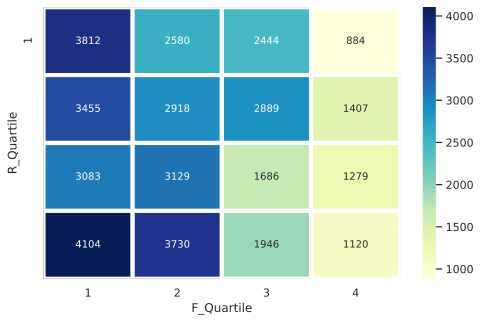

In [24]:

rfm_table = rfmSegmentation.pivot_table(
                        index='R_Quartile', 
                        columns='F_Quartile', 
                        values='monetary_value', 
                        aggfunc=np.median).applymap(int)
sns.heatmap(rfm_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=4.15, annot_kws={"size": 10},yticklabels=4);

In [25]:
rfmSegmentation.RFMClass.value_counts().sort_values(ascending = False)

444    67
443    37
344    31
144    31
111    30
       ..
412     2
424     2
331     2
134     2
114     1
Name: RFMClass, Length: 62, dtype: int64